In [1]:
import uproot
import pandas as pd
import numpy as np
import glob


In [2]:
# !pip install pycaret

In [93]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [263]:
# Define the pattern to match your files
file_pattern = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v1_241030_roe_Dptag_CFT_nopi0veto/MC15*.root"
file_list = glob.glob(file_pattern)

dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    branches = ['Pip_dz','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

# df_bkg = df_bkg.query('num_Dstar_no_nan<0')

In [264]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Pip_dz                                                False
Dp_Psum                                               False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
dtype: bool


In [265]:
file_pattern_signal = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi/241013_loose_v1_roe_Dptag_nopi0veto/*.root"
file_list_signal = glob.glob(file_pattern_signal)

file_pattern_signal_cc = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/Dptoetapip_pipipi_cc/241013_loose_v1_roe_Dptag_nopi0veto/*.root"
file_list_signal_cc = glob.glob(file_pattern_signal_cc)

file_list_signal += file_list_signal_cc

dataframes_signal = []

for file_name in file_list_signal:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    # branches = ['Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names
    branches = ['Pip_dz','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum',"Pip_dr","Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')
# df_signal = df_signal.query('Dp_M<1.93 | Dp_M>2.02')
# df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

# df_signal = df_signal.query('abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7')
# df_signal = df_signal.query('num_Dstar_no_nan<0')

# Define the new column based on the given formula
# df_signal['momentum_asym'] = (df_signal['etapip_Eta_p'] - df_signal['Pip_p']) / (df_signal['etapip_Eta_p'] + df_signal['Pip_p'])
df_signal['Dp_Psum'] = (df_signal['etapip_Eta_p'] + df_signal['Pip_p'])

# df_signal = df_signal.query('num_Dstar_no_nan<0')

In [266]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Pip_dz                                                False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                                  False
num_Dstar_no_nan                                      False
Dp_Psum                                               False
dtype: bool


In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)


In [268]:
df_combined.describe()

,Pip_dz,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Dp_Psum,label
count,343612.000000,343612.000000,3.436120e+05,343612.000000,343612.000000,343612.000000
mean,0.003616,0.096714,1.320315e-02,0.498490,3.815153,0.500000
std,0.054217,0.632540,2.455975e-02,0.835494,0.706824,0.500001
min,-2.761134,-1.000000,3.991127e-09,-1.000000,2.201436,0.000000
25%,-0.022867,-0.493091,1.329624e-03,-0.005310,3.297671,0.000000
50%,0.002338,0.175231,3.636627e-03,0.999238,3.734596,0.500000
75%,0.027928,0.717996,1.407028e-02,0.999978,4.243648,1.000000
max,2.991135,0.999995,9.914546e-01,1.000000,7.295849,1.000000


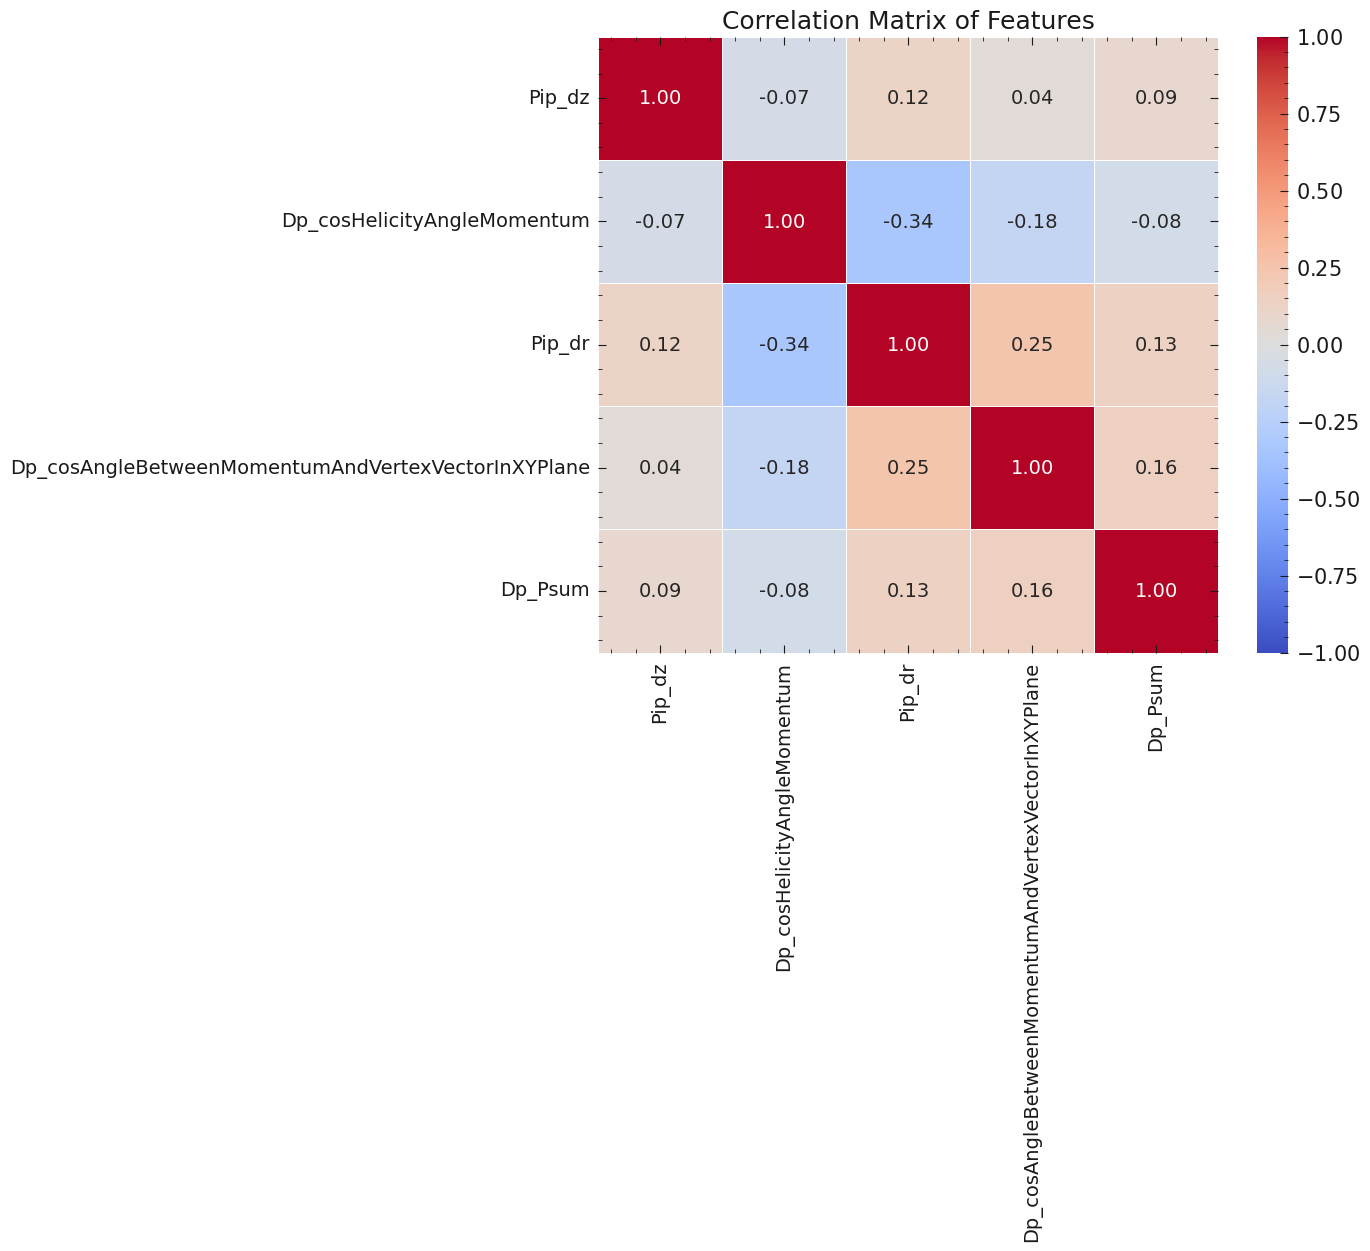

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
# plt.rcParams['text.usetex'] = True

# # Rename the features
# feature_names = {
#     'Pip_dr': r'$dr(\pi^+)$',
#     'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
#     'etapip_Eta_Easym': r'$|\frac{E_{\gamma_1} - E_{\gamma_2} }{E_{\gamma_1} + E_{\gamma_2}}|$',
#     'etapip_Eta_daughterDiffOfPhi_0_1': r'$\Delta \phi (\gamma_1,\gamma_2)$',
#     'momentum_asym': r'$\frac{p(\eta)-p(\pi^+)}{p(\eta)+p(\pi^+)}$',
#     'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
# }

# # Apply the renaming
# df_combined.rename(columns=feature_names, inplace=True)

# Compute the correlation matrix
corr_matrix = df_combined.drop(columns=['label']).corr()

# Plot the correlation matrix with larger annotation text
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            vmin=-1, vmax=1,  # Set the limits of the colormap
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
            annot_kws={"size": 14})  # Increase the size of the correlation numbers

# Set the title and label sizes
plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
plt.xticks(fontsize=14)  # X-axis label size
plt.yticks(fontsize=14)  # Y-axis label size

# # Ensure the path is expanded correctly
# save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# plt.tight_layout()
# # Save the figure
# plt.savefig(save_path)

plt.show()


In [17]:
import pandas as pd
from pycaret.classification import setup, compare_models, tune_model, save_model

# Example dataframe
# df = pd.read_csv('your_dataset.csv')

# Initialize the setup for classification
clf = setup(data=df_combined, target='label', session_id=55, use_gpu=False)

# Compare different models and get the best one
best_model = compare_models()

# Optionally tune the hyperparameters of the best model
tuned_model = tune_model(best_model)

# Save the best-tuned model to a file
save_model(tuned_model, 'best_model_pycaret_etapip_pipipi')

,Description,Value
0,Session id,55
1,Target,label
2,Target type,Binary
3,Original data shape,"(343612, 5)"
4,Transformed data shape,"(343612, 5)"
5,Transformed train set shape,"(240528, 5)"
6,Transformed test set shape,"(103084, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8790,0.9460,0.8717,0.8846,0.8781,0.7580,0.7581,0.3290
gbc,Gradient Boosting Classifier,0.8785,0.9454,0.8728,0.8828,0.8778,0.7569,0.7570,5.2000
xgboost,Extreme Gradient Boosting,0.8783,0.9452,0.8711,0.8838,0.8774,0.7566,0.7567,3.0200
catboost,CatBoost Classifier,0.8783,0.9456,0.8703,0.8846,0.8774,0.7567,0.7568,23.8230
rf,Random Forest Classifier,0.8733,0.9391,0.8645,0.8800,0.8721,0.7465,0.7467,7.5260
et,Extra Trees Classifier,0.8719,0.9384,0.8651,0.8770,0.8710,0.7438,0.7438,3.2910
ada,Ada Boost Classifier,0.8709,0.9393,0.8652,0.8753,0.8702,0.7419,0.7419,1.1590
knn,K Neighbors Classifier,0.8473,0.9055,0.8504,0.8451,0.8478,0.6946,0.6946,0.2770
qda,Quadratic Discriminant Analysis,0.8355,0.9119,0.8578,0.8211,0.8391,0.6709,0.6716,0.0400
lr,Logistic Regression,0.8268,0.9036,0.8491,0.8129,0.8306,0.6537,0.6543,0.2680


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8804,0.9473,0.8716,0.8872,0.8793,0.7608,0.7609
1,0.8835,0.9482,0.8798,0.8863,0.8830,0.7669,0.7670
2,0.8769,0.9443,0.8685,0.8833,0.8758,0.7537,0.7538
3,0.8768,0.9450,0.8721,0.8803,0.8762,0.7535,0.7536
4,0.8788,0.9457,0.8715,0.8843,0.8779,0.7575,0.7576
5,0.8781,0.9454,0.8705,0.8840,0.8772,0.7563,0.7564
6,0.8769,0.9444,0.8709,0.8815,0.8762,0.7538,0.7538
7,0.8781,0.9454,0.8735,0.8817,0.8776,0.7563,0.7563
8,0.8791,0.9464,0.8744,0.8827,0.8785,0.7582,0.7582


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Dp_cosHelicityAngleMomentum',
                                              'Pip_dr',
                                              'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
                                              'Dp_Psum'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('ca...
                  LGBMClassifier(boosting_type='gbdt', class

In [269]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X, y)



# Get the best model and its parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model if needed
import joblib
joblib.dump(best_xgb_model, 'best_xgb_model_etapip_pipipi_ImpactXY.pkl')


# xgb_model.fit(X,y)
# best_xgb_model = xgb_model


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8798897019464886


['best_xgb_model_etapip_pipipi_ImpactXY.pkl']

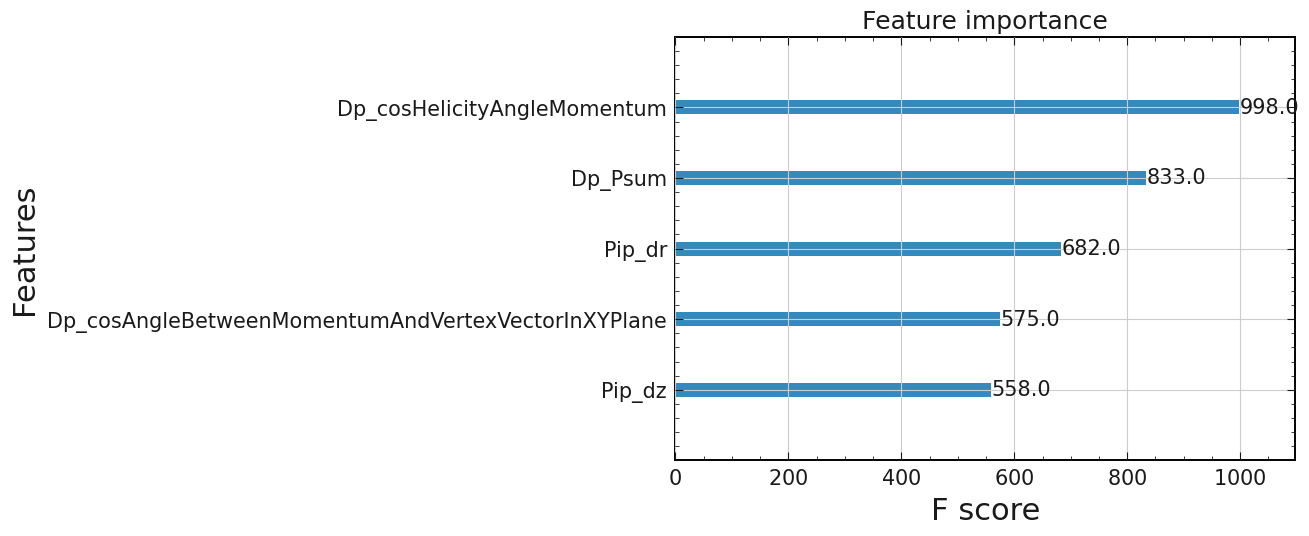

In [271]:
import xgboost as xgb
model = best_xgb_model
xgb.plot_importance(model, importance_type='weight')  # 'weight', 'gain', or 'cover'
plt.show()

In [272]:
plt.rcParams['font.family'] = 'DejaVu Sans'


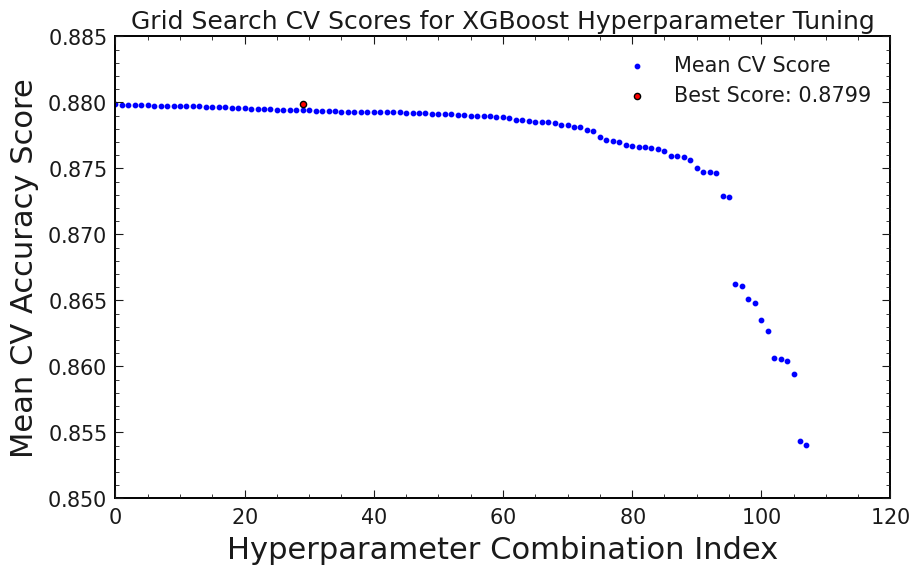

In [273]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend()
plt.xlim(0,)
# Save the figure
plt.savefig("MC15ri_etapip_pipipi_gridsearch_dz.png")

# Show the plot
plt.show()


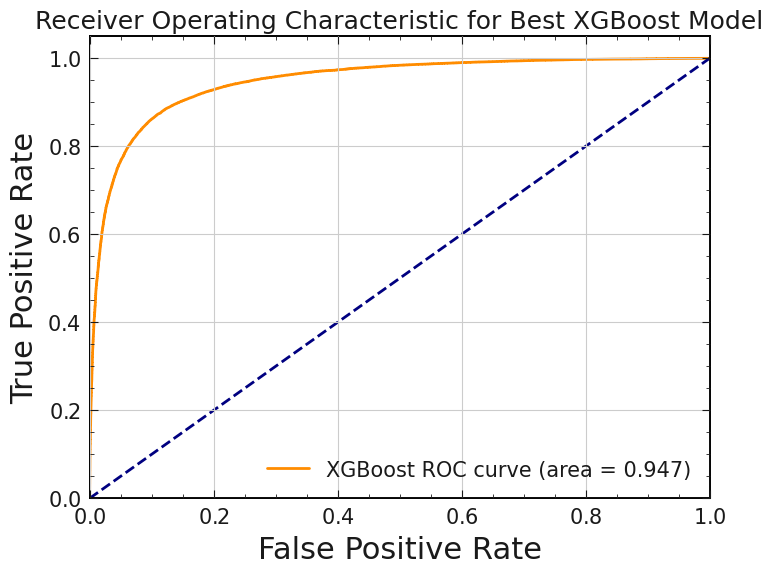

In [274]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
plt.savefig("MC15ri_etapip_pipipi_roc_dz.png")

plt.show()

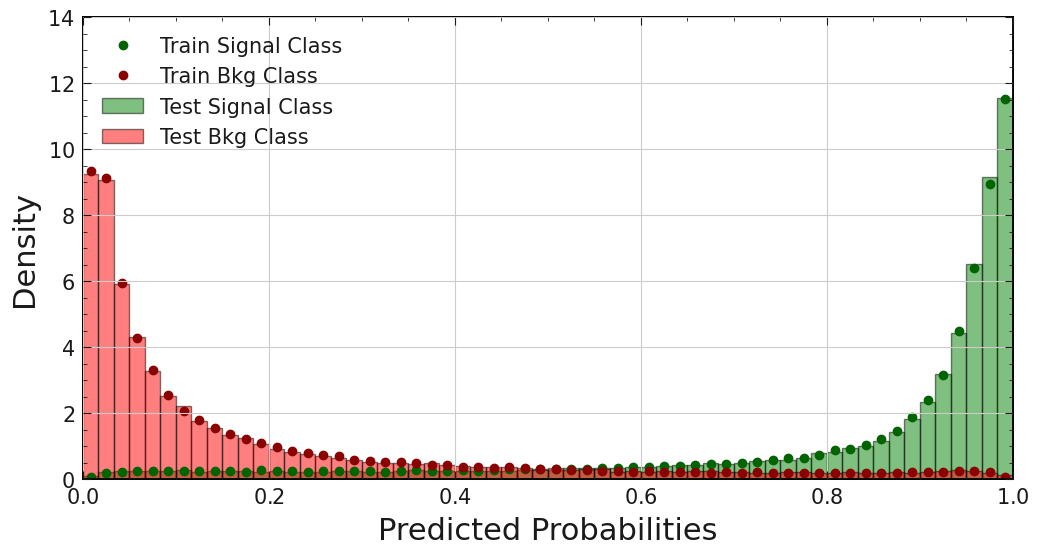

In [275]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]
# y_train_probs =   catboost.predict_proba(X_train)[:, 1]
# y_test_probs =  catboost.predict_proba(X_test)[:, 1]
# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/241004_outputs_momentum_sum_etapip_pipipi.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
plt.savefig("MC15ri_etapip_pipipi_BDT_output_dz.png")
plt.show()


In [276]:
# Define the pattern to match your files
file_pattern = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v1_241030_roe_Dptag_CFT_nopi0veto/MC15*.root"
file_list = glob.glob(file_pattern)

dataframes = []
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_pipipi"]

    # Specify the branches you want to extract
    branches = ['Pip_dz','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)
# df_bkg_apply = df_bkg_apply.query('num_Dstar_no_nan<0')

# df_bkg = df_bkg.query('Dp_isSignal!=1')
# df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

In [277]:
# df_bkg_apply = df_bkg

In [278]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')




In [279]:
df_isSignal_false

,Pip_dz,Dp_Psum,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan
0,-0.012284,2.740633,4.0,0.0,223.0,0.0,-0.898919,0.002034,0.0,0.989108,0.428092,2.682830,2.312541,0.923266,1.908210,-1.0
1,-0.043114,4.659828,9.0,0.0,421.0,0.0,0.767091,0.001630,NaN,-0.999845,3.734726,3.679476,0.925102,0.836622,1.795437,-1.0
3,-0.015759,3.028641,2.0,0.0,23.0,0.0,-0.730816,0.000834,NaN,0.872822,0.599053,2.842980,2.429588,0.554667,1.901040,-1.0
4,-0.013814,2.961358,15.0,0.0,-421.0,0.0,-0.789591,0.007169,NaN,0.779651,0.531956,2.745469,2.429402,0.499088,1.903562,-1.0
5,-0.011657,2.662889,28.0,0.0,-20213.0,0.0,-0.687644,0.004667,0.0,-0.997895,0.613071,2.768207,2.049818,0.254459,1.849903,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7887294,-0.009056,3.351422,10.0,0.0,113.0,0.0,0.897747,0.001221,NaN,-0.999789,2.880952,3.709401,0.470470,0.769268,1.646104,-1.0
7887295,0.006593,3.612340,2.0,0.0,23.0,0.0,-0.886536,0.014470,NaN,0.998889,0.336010,2.904581,3.276330,0.558414,1.639273,-1.0
7887296,0.006593,3.563986,2.0,4.0,23.0,331.0,-0.881229,0.014470,0.0,0.998681,0.336011,2.850300,3.227976,0.380552,1.605833,-1.0
7887297,0.006593,3.651547,2.0,0.0,23.0,0.0,-0.887420,0.014470,NaN,0.996937,0.336010,2.935096,3.315537,0.558414,1.643097,-1.0


In [280]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Dp_CMS_p','CFT_prob','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)



In [281]:
df_isSignal_true_dropped

,Pip_dz,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane
2,-0.015674,3.662163,-0.821843,0.007145,0.999999
132,0.045439,4.798670,-0.851081,0.011037,0.999986
152,0.001171,3.714567,-0.364357,0.091804,0.999994
174,0.038117,3.319153,0.049075,0.009794,0.999991
227,0.006265,3.639215,-0.150870,0.015608,0.999963
...,...,...,...,...,...
3651170,0.021090,4.138941,0.021994,0.001537,0.998152
4026730,-0.000139,3.693197,-0.580733,0.068584,0.999948
5913243,0.116215,3.879654,-0.561737,0.018398,0.999999
7267411,-0.012946,3.901892,-0.636594,0.119339,0.999987


In [282]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [283]:
# # Predict probabilities for both datasets
# isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
# df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]  # Probability of the positive class (signal)

# isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
# df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]  # Probability of the positive class (signal)

# # Optionally, you can combine the datasets back with 'Dp_M' if needed
# df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
# df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)

In [284]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [285]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [286]:
df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan>-1000')

In [287]:
df_combined_all_range.columns.tolist()

['Pip_dz',
 'Dp_Psum',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'prob_signal']

In [288]:
df_combined = df_combined_all_range.query('Dp_M>1.85 & Dp_M<1.885')

Best cut value: 0.85
Best figure of merit: 137.1039946088747


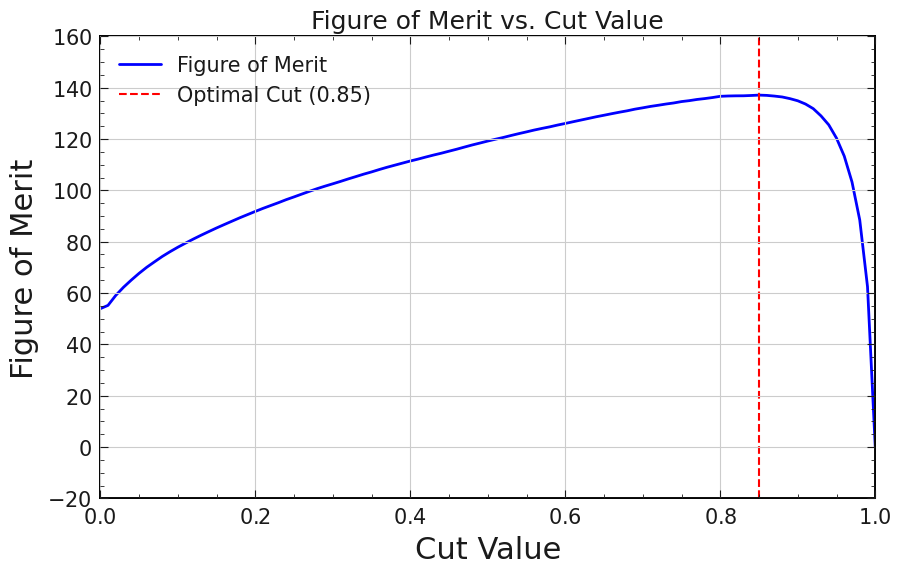

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    Nbkg = (df_cut['Dp_isSignal'] == 0).sum()
    if Nsig + Nbkg == 0:
        return 0
    return Nsig / np.sqrt(Nsig + Nbkg)

# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.savefig("MC15ri_etapip_pipipi_FOM_dz.png")

plt.show()

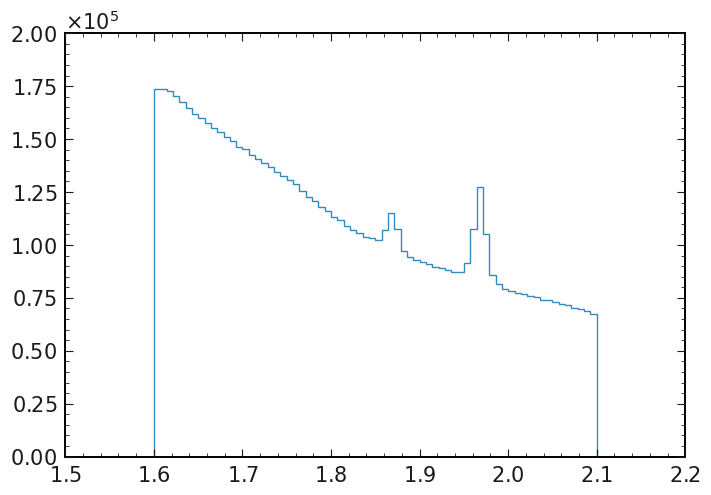

In [290]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

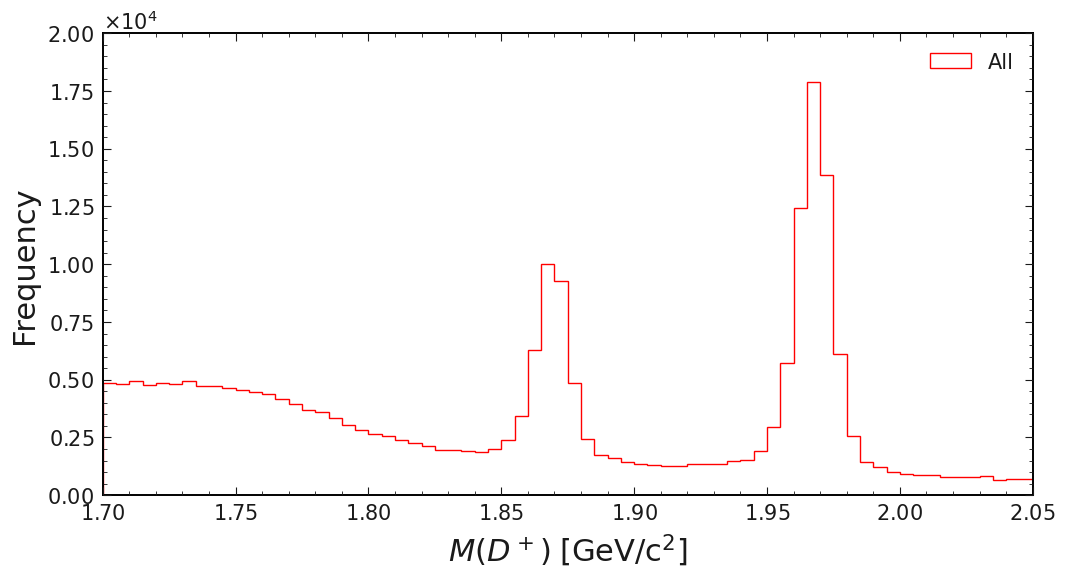

nsig=28493
nsig=12166.511


In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Frequency')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

plt.savefig("MC15ri_etapip_pipipi_Dp_M_all_dz.png")

plt.show()


scale = 427/1000
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

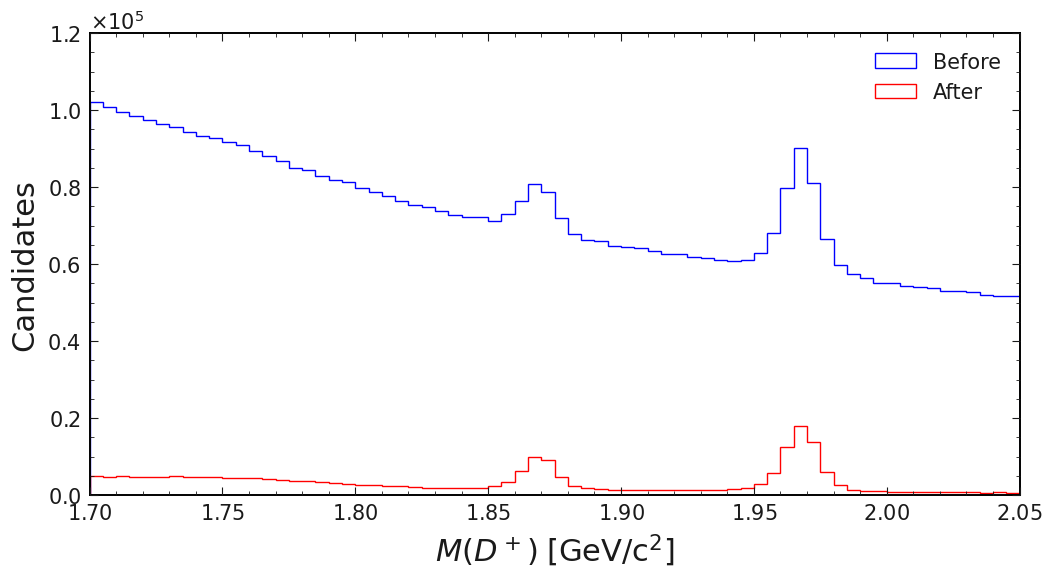

nsig=7887299
nsig=3367876.673


In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
plt.savefig("MC15ri_etapip_pipipi_Dp_M_before_after_dz.png")

plt.show()


scale = 427/1000
print(f'nsig={len(df_signal)}')
print(f'nsig={len(df_signal)*scale}')

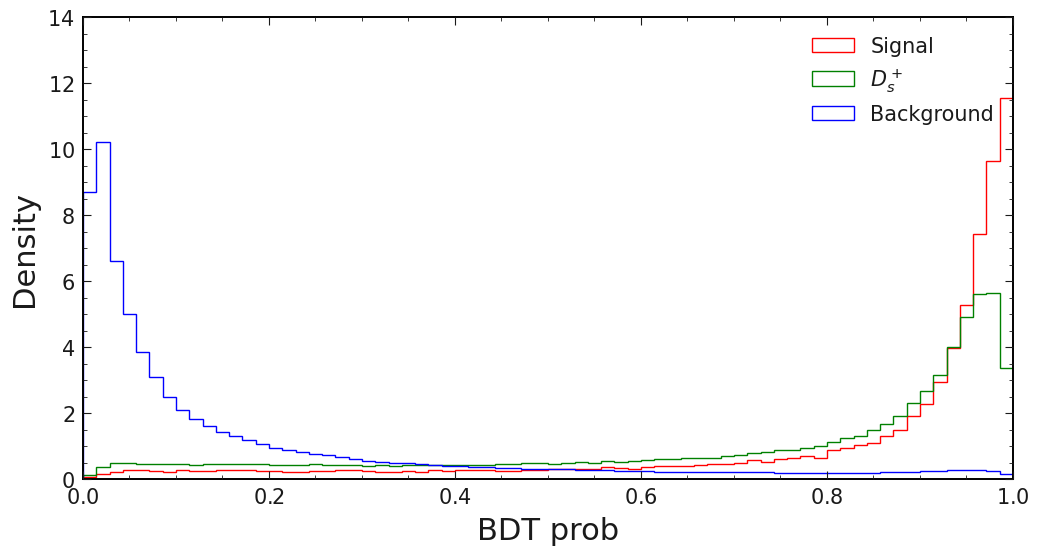

nsig=41216


In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
plt.savefig("MC15ri_etapip_pipipi_BDT_output_Dp_Ds_bkg_dz.png")

plt.show()


print(f'nsig={len(df_signal)}')